In [98]:
%matplotlib inline

import random 
from mayavi import mlab
from mxnet import autograd, np, npx
from d2l import mxnet as d2l 

npx.set_np()

In [99]:
def synthetic_data(w, b, num_examples):
    """Generate y = Xw + b + noise."""
    X=np.random.normal(0,1, (num_examples,len(w)))
    y=np.dot(X, w)+b
    y+=np.random.normal(0,0.01, y.shape)
    return X, y.reshape((-1,1))

In [100]:
true_w=np.array([2,-3.4])
true_b=4.2
features, labels=synthetic_data(true_w, true_b,1000)

In [101]:
(1000,len(true_w))

(1000, 2)

In [102]:
print('features:', features[0],'\nlabel:', labels[0])
print('features:', features[1],'\nlabel:', labels[1])

features: [ 0.84852755 -1.0255257 ] 
label: [9.383714]
features: [ 0.2519549 -0.6840703] 
label: [7.0511203]


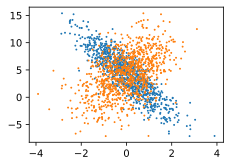

In [103]:
d2l.set_figsize()
# The semicolon is for displaying the plot only
d2l.plt.scatter(features[:, (1)].asnumpy(), labels.asnumpy(),1)
d2l.plt.scatter(features[:, (0)].asnumpy(), labels.asnumpy(),1)

In [104]:
def data_iter(batch_size, features,labels):
	num_examples=len(features)
	indices=list(range(num_examples))
	# The examples are read at random, in no particular order
	random.shuffle(indices)
	for i in range(0, num_examples, batch_size):
		batch_indices=np.array(indices[i:min(i+batch_size, num_examples)])
		yield features[batch_indices], labels[batch_indices]

In [105]:
batch_size=10
for X, y in data_iter(batch_size, features, labels):
    print(X,'\n###\n', y)
    break

[[ 0.30379388  0.08438626]
 [ 0.81394386  1.1462485 ]
 [ 1.1996737   0.27205122]
 [ 1.8021904  -0.177237  ]
 [ 1.1176342  -0.17328027]
 [-0.22247976 -2.2770264 ]
 [ 0.23280233 -0.55520165]
 [-0.24812078 -0.314955  ]
 [-0.2707844   2.3080974 ]
 [-1.1769478  -1.0147783 ]] 
###
 [[ 4.5292826]
 [ 1.9425876]
 [ 5.6859694]
 [ 8.407425 ]
 [ 7.0196586]
 [11.499087 ]
 [ 6.5428762]
 [ 4.7698784]
 [-4.193198 ]
 [ 5.3045793]]


In [106]:
w=np.random.normal(0,0.01,(2,1))
#w=np.zeros((2,1))
b=np.zeros(1)
w.attach_grad()
b.attach_grad()

In [107]:
def linreg(X,w,b):
    """ the linear regression model """
    return np.dot(X,w)+b

In [108]:
def squared_loss(y_hat,y):
    """Squared loss """
    return (y_hat-y.reshape(y_hat.shape))**2/2

In [109]:
def sgd(params,lr,batch_size):
    """Minibatch stochastic gradient descent"""
    for param in params:
        param[:]=param-lr*param.grad/batch_size

In [110]:
lr=0.03
num_epochs=3
net = linreg
loss=squared_loss

In [111]:
for epoch in range(num_epochs):
    for X,y in data_iter(batch_size,features,labels):
        with autograd.record():
            l=loss(net(X,w,b),y)
        l.backward()
        sgd([w,b],lr,batch_size)
    train_1=loss(net(features,w,b),labels)
    print(f"epoch {epoch+1},loss {float(train_1.mean()):f}")

epoch 1,loss 0.039993
epoch 2,loss 0.000154
epoch 3,loss 0.000048


In [112]:
print(f'error in estimating w:{true_w-w.reshape(true_w.shape)}')
print(f'error in estimating b:{true_b-b}')

error in estimating w:[0.00074339 0.00018072]
error in estimating b:[0.00026608]


In [113]:
w.shape,true_w.shape

((2, 1), (2,))